In [ ]:
# This dataset was downloaded from: https://archive.ics.uci.edu/ml/datasets/Heart+Disease
# The purpose is to identify the presence of heart disease in patients using various attributes
# The purpose of this project is to go through data cleaning exercises
# Identifying shapes and data types, identifying any potential missing data, irregularities/outliers & address inconsistencies
# Author: Ava Connolly (2020)

In [2]:
import pandas as pd

In [3]:
import numpy as np 

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
import matplotlib.mlab as mlab

In [7]:
import matplotlib

In [8]:
plt.style.use('ggplot')

In [9]:
from matplotlib.pyplot import figure

In [10]:
%matplotlib inline

In [11]:
matplotlib.rcParams['figure.figsize'] = (12,8)

In [12]:
pd.options.mode.chained_assignment = None

In [13]:
# Read the dataset 

In [14]:
df = pd.read_csv('heart.csv')

In [15]:
# Identify shape and data types 

In [16]:
print(df.shape)

(303, 14)


In [17]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [18]:
# Select the numerical data columns 

In [19]:
df_numeric = df.select_dtypes(include=[np.number])

In [20]:
numeric_cols = df_numeric.columns.values

In [21]:
print(numeric_cols)

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


In [22]:
# Select the non-numerical data columns 

In [23]:
df_non_numeric = df.select_dtypes(exclude=[np.number])

In [24]:
non_numeric_cols = df_non_numeric.columns.values

In [25]:
print(non_numeric_cols)

[]


In [26]:
# After taking a brief look, I know there are 303 rows, and 14 columns of data. This is pretty small.

In [27]:
# I've also identified there are only numerical data columns 

In [28]:
# Up next, I want to find out what data is missing. I knew before downloading this data that it has a usability rating of 7.6/10.0

In [29]:
# Identifying missing data: Heatmap 
# This is a good option when there are a low amount of features, like this example

In [30]:
cols = df.columns[:14] # Listing all 14 columns here

In [31]:
colors = ['#ff4040', '#bada55'] # First hex color is green for available data, second is red for otherwise/missing

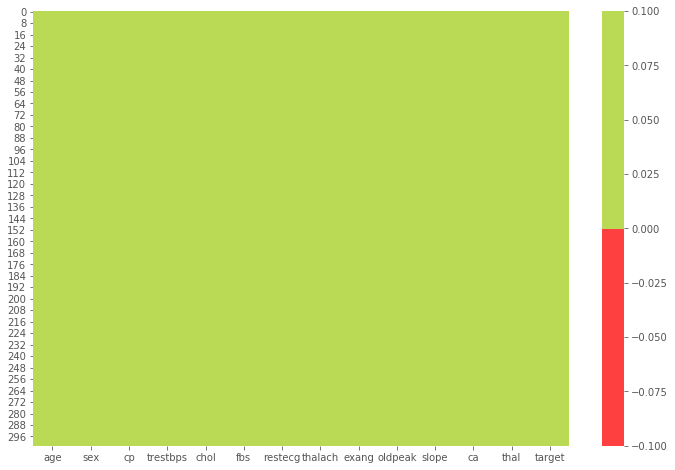

In [32]:
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

In [33]:
# The heatmap above demonstrates there is no missing data for all features
# The horizontal axis shows the feature name, the vertical axis shows the number of observations

In [34]:
# Further verifying no missing data: data percentage list 
# Data percentage lists are great when there are more features, or you need something to compliment it 

In [35]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

age - 0.0%
sex - 0.0%
cp - 0.0%
trestbps - 0.0%
chol - 0.0%
fbs - 0.0%
restecg - 0.0%
thalach - 0.0%
exang - 0.0%
oldpeak - 0.0%
slope - 0.0%
ca - 0.0%
thal - 0.0%
target - 0.0%


In [36]:
# Identifying irregular data/outliers: Histograms and Box Plots
# When your features are numeric, histograms & box plots are your friends
# Below: a histogram of feature of resting blood pressure ('trestbps')

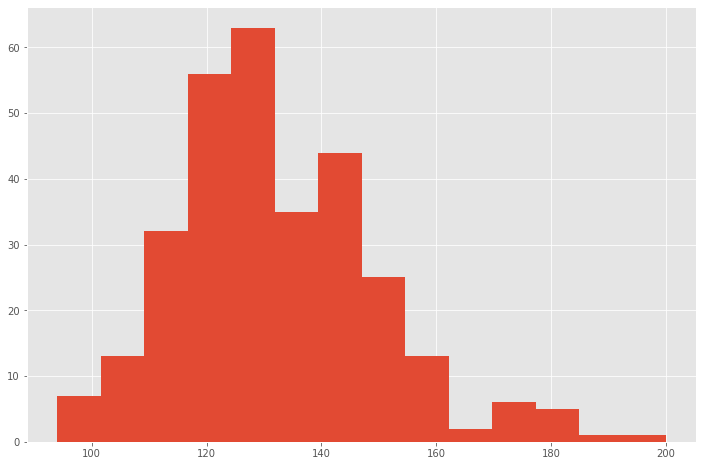

In [37]:
df['trestbps'].hist(bins=14)

In [38]:
# Above: Fasting blood sugar level data looks to be fairly normal
# I'd like to explore some potential outliers

In [39]:
# Below: A box plot of the same category ('trestbps')

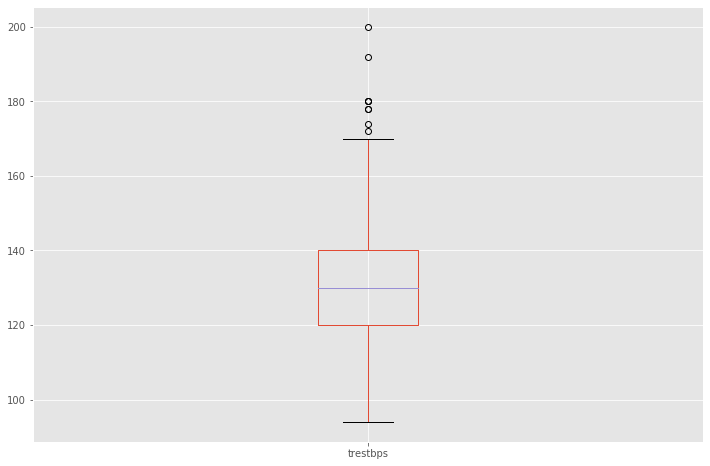

In [40]:
df.boxplot(column=['trestbps'])

In [41]:
# Above: Average occurs around 120-140, and a few points occur beyond 170 bpm

In [42]:
# I'd like to further investigate outliers by performing descriptive statistics 
# For numeric features, the outliers could be so distinct that the box plot cannot effectively visualize them

In [43]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [44]:
# There are many other ways to identify outliers such as z-scores, scatter plots, and clutering
# While outliers are not difficult to detect, it can be difficult to know what to do once you find them
# You can either drop them, or keep them; it all depends on the dataset and your goal

In [45]:
# Identifying duplicated: All features based 
# First, remove unique identifier 'age' in the dataset 
# Second, create a dataset called 'df_dedupped' by dropping duplicates
# Third, Compare shapes of two datasets (df and df_dedupped) to discover number of duplicated rows

In [46]:
df_dedupped = df.drop('age', axis=1).drop_duplicates()
print(df.shape)
print(df_dedupped.shape)

(303, 14)
(302, 13)


In [ ]:
# Sometimes it's better to remove duplicate data based on a set of unique identifiers
# The chances of two patients having the same unique values are close to zero 

In [ ]:
# Addressing inconsistent data: Formatting
# This is more relevant for timestamps, zipcodes, etc but it's good practice to check 

In [47]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Other inconsistencies to watch for: capitalization, and categorical values 
# Again, it just depends on the dataset you're working with and your goals